# Preparing Data for Machine Learning

# Concept Session

## Demo 1.1: Data Preparation

### Loading Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

### Loading Data

In [2]:
loan_df=pd.read_csv('DS1_C9_S1_Concept_Loan_Data.csv')
loan_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0.0,0.0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0.0,0.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0.0,0.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0.0,0.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0.0,1.0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0.0,1.0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0.0,1.0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0.0,1.0


### Understanding data structure

In [5]:
# All columns
loan_df_c=loan_df
columns=loan_df_c.columns
columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
# structure of dataset
loan_df_c.shape

(9578, 14)

In [9]:
loan_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9575 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9574 non-null   float64
 13  not.fully.paid     9574 non-null   float64
dtypes: float64(8), int64(5), object(1)
memory usage: 1.0+ MB


In [11]:
# Summary of dataset
loan_df_c.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9575.000000,9578.000000,9578.000000,9574.000000,9574.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.797147,1.577469,0.163708,0.062147,0.160121
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.018510,2.200245,0.546215,0.262178,0.366738
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [13]:
# Count of each label in categorical column
loan_df_c.purpose.value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [15]:
loan_df_c['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

In [17]:
loan_df_c['not.fully.paid'].value_counts()

not.fully.paid
0.0    8041
1.0    1533
Name: count, dtype: int64

### Missing Value Treatment

In [19]:
loan_df_c.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           3
inq.last.6mths       0
delinq.2yrs          0
pub.rec              4
not.fully.paid       4
dtype: int64

In [21]:
loan_df_c['revol.util']=loan_df_c['revol.util'].fillna(loan_df_c['revol.util'].mean())

In [23]:
loan_df_c['pub.rec']=loan_df_c['pub.rec'].fillna(loan_df_c['pub.rec'].mean())

In [25]:
loan_df_c['not.fully.paid']=loan_df_c['not.fully.paid'].fillna(loan_df_c['not.fully.paid'].mean())

In [27]:
loan_df_c.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

#### Findings:


In [23]:
# Treating missing values


### Feature Engineering

In [29]:
# Converting object data type into categorical column

loan_df_c['purpose']=loan_df_c['purpose'].astype("category")


In [31]:
loan_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   credit.policy      9578 non-null   int64   
 1   purpose            9578 non-null   category
 2   int.rate           9578 non-null   float64 
 3   installment        9578 non-null   float64 
 4   log.annual.inc     9578 non-null   float64 
 5   dti                9578 non-null   float64 
 6   fico               9578 non-null   int64   
 7   days.with.cr.line  9578 non-null   float64 
 8   revol.bal          9578 non-null   int64   
 9   revol.util         9578 non-null   float64 
 10  inq.last.6mths     9578 non-null   int64   
 11  delinq.2yrs        9578 non-null   int64   
 12  pub.rec            9578 non-null   float64 
 13  not.fully.paid     9578 non-null   float64 
dtypes: category(1), float64(8), int64(5)
memory usage: 982.6 KB


In [33]:
# Using Label Encoder technique to convert categorical column into numerical type
Label_Encoder=preprocessing.LabelEncoder()

loan_df_c['Purpose_encode']=Label_Encoder.fit_transform(loan_df_c['purpose'])

In [35]:
loan_df_c['Purpose_encode'].unique()

array([2, 1, 0, 4, 6, 5, 3])

In [37]:
loan_df_c.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Purpose_encode
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0.0,0.0,2
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0.0,0.0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0.0,0.0,2
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0.0,0.0,2
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0.0,0.0,1


In [39]:
loan_df_c['not.fully.paid']=loan_df_c['not.fully.paid'].astype("category")
loan_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   credit.policy      9578 non-null   int64   
 1   purpose            9578 non-null   category
 2   int.rate           9578 non-null   float64 
 3   installment        9578 non-null   float64 
 4   log.annual.inc     9578 non-null   float64 
 5   dti                9578 non-null   float64 
 6   fico               9578 non-null   int64   
 7   days.with.cr.line  9578 non-null   float64 
 8   revol.bal          9578 non-null   int64   
 9   revol.util         9578 non-null   float64 
 10  inq.last.6mths     9578 non-null   int64   
 11  delinq.2yrs        9578 non-null   int64   
 12  pub.rec            9578 non-null   float64 
 13  not.fully.paid     9578 non-null   category
 14  Purpose_encode     9578 non-null   int32   
dtypes: category(2), float64(7), int32(1), int64(5)
memory u

In [41]:
loan_df_c['not.fully.paid_encode']=Label_Encoder.fit_transform(loan_df_c['not.fully.paid'])

In [32]:
loan_df_c.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Purpose_encode,not.fully.paid_encode
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0.0,0.0,2,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0.0,0.0,1,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0.0,0.0,2,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0.0,0.0,2,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0.0,0.0,1,0


In [43]:
loan_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   credit.policy          9578 non-null   int64   
 1   purpose                9578 non-null   category
 2   int.rate               9578 non-null   float64 
 3   installment            9578 non-null   float64 
 4   log.annual.inc         9578 non-null   float64 
 5   dti                    9578 non-null   float64 
 6   fico                   9578 non-null   int64   
 7   days.with.cr.line      9578 non-null   float64 
 8   revol.bal              9578 non-null   int64   
 9   revol.util             9578 non-null   float64 
 10  inq.last.6mths         9578 non-null   int64   
 11  delinq.2yrs            9578 non-null   int64   
 12  pub.rec                9578 non-null   float64 
 13  not.fully.paid         9578 non-null   category
 14  Purpose_encode         9578 non-null   i

In [34]:
loan_df_c['not.fully.paid_encode'].unique()

array([0, 2, 1], dtype=int64)

In [35]:
loan_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   credit.policy          9578 non-null   int64   
 1   purpose                9578 non-null   category
 2   int.rate               9578 non-null   float64 
 3   installment            9578 non-null   float64 
 4   log.annual.inc         9578 non-null   float64 
 5   dti                    9578 non-null   float64 
 6   fico                   9578 non-null   int64   
 7   days.with.cr.line      9578 non-null   float64 
 8   revol.bal              9578 non-null   int64   
 9   revol.util             9578 non-null   float64 
 10  inq.last.6mths         9578 non-null   int64   
 11  delinq.2yrs            9578 non-null   int64   
 12  pub.rec                9578 non-null   float64 
 13  not.fully.paid         9578 non-null   category
 14  Purpose_encode         9578 non-null   i

In [45]:
loan_df_c['credit.policy']=loan_df_c['credit.policy'].astype("category")
loan_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   credit.policy          9578 non-null   category
 1   purpose                9578 non-null   category
 2   int.rate               9578 non-null   float64 
 3   installment            9578 non-null   float64 
 4   log.annual.inc         9578 non-null   float64 
 5   dti                    9578 non-null   float64 
 6   fico                   9578 non-null   int64   
 7   days.with.cr.line      9578 non-null   float64 
 8   revol.bal              9578 non-null   int64   
 9   revol.util             9578 non-null   float64 
 10  inq.last.6mths         9578 non-null   int64   
 11  delinq.2yrs            9578 non-null   int64   
 12  pub.rec                9578 non-null   float64 
 13  not.fully.paid         9578 non-null   category
 14  Purpose_encode         9578 non-null   i

In [47]:
loan_df_c['credit.policy_encode']=Label_Encoder.fit_transform(loan_df_c['credit.policy'])

In [38]:
loan_df_c.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Purpose_encode,not.fully.paid_encode,credit.policy_encode
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0.0,0.0,2,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0.0,0.0,1,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0.0,0.0,2,0,1
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0.0,0.0,2,0,1
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0.0,0.0,1,0,1


In [39]:
#label_encoder object knows how to understand word labels.


### Feature Scaling

In [41]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
    numerics = ['int64', 'float64','int32']
    new_loan_df = loan_df_c.select_dtypes(include = numerics)
    if scale =='minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(new_loan_df.to_numpy()),columns=new_loan_df.columns)
    return df_scaled

In [42]:
# scaling the data using MinMax Scaling process
scale = 'minmax'
loan_df_scaled = feature_scale(scale)
loan_df_scaled

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,Purpose_encode,not.fully.paid_encode,credit.policy_encode
0,0.376598,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0.000000,0.000000,0.0,0.333333,0.0,1.0
1,0.301151,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0.000000,0.000000,0.0,0.166667,0.0,1.0
2,0.484015,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,0.030303,0.000000,0.0,0.333333,0.0,1.0
3,0.260870,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,0.030303,0.000000,0.0,0.333333,0.0,1.0
4,0.528133,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0.000000,0.076923,0.0,0.166667,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.550512,0.355977,0.663709,0.346796,0.279070,0.589602,0.178383,0.689916,0.060606,0.000000,0.0,0.000000,1.0,0.0
9574,0.417519,0.261804,0.514888,0.007009,0.511628,0.240596,0.000152,0.009244,0.151515,0.000000,0.0,0.000000,1.0,0.0
9575,0.301151,0.088851,0.436785,0.436916,0.348837,0.187337,0.008312,0.696639,0.242424,0.000000,0.0,0.333333,1.0,0.0
9576,0.639386,0.363354,0.468750,0.640187,0.372093,0.092838,0.000000,0.026891,0.151515,0.000000,0.0,0.666667,1.0,0.0


### Feature Selection

In [44]:
# Finding correlation among numerical features, based on their strong relation we can choose the important features
corr=loan_df_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,Purpose_encode,not.fully.paid_encode,credit.policy_encode
int.rate,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464815,0.202780,0.156079,0.098096,0.117067,0.159143,-0.294089
installment,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081349,-0.010419,-0.004368,-0.032782,0.154827,0.049821,0.058770
log.annual.inc,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054804,0.029171,0.029203,0.016451,0.088958,-0.033752,0.034906
dti,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337160,0.029189,-0.021792,0.006143,-0.053279,0.036977,-0.090901
fico,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541202,-0.185293,-0.216340,-0.147558,0.057337,-0.149441,0.348319
days.with.cr.line,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024195,-0.041736,0.081374,0.071846,0.047526,-0.029125,0.099026
revol.bal,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203789,0.022394,-0.033243,-0.031044,0.042364,0.053497,-0.187518
revol.util,0.464815,0.081349,0.054804,0.337160,-0.541202,-0.024195,0.203789,1.000000,-0.013828,-0.042719,0.066626,-0.062927,0.082375,-0.104132
inq.last.6mths,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013828,1.000000,0.021245,0.072625,0.037516,0.149152,-0.535511
delinq.2yrs,0.156079,-0.004368,0.029203,-0.021792,-0.216340,0.081374,-0.033243,-0.042719,0.021245,1.000000,0.009155,-0.011701,0.008709,-0.076318


<Axes: >

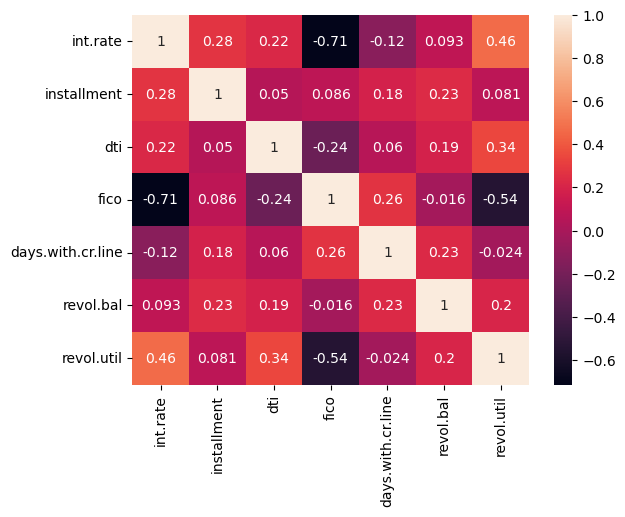

In [45]:
# Correlation Heatmap
new_df_scaled=loan_df_scaled[['int.rate','installment', 'dti','fico', 'days.with.cr.line', 'revol.bal','revol.util']]
hm=sns.heatmap(new_df_scaled.corr(),annot=True)
hm

#### Findings:


In [47]:
# Drop the column which is highly correlated with other columns
loan_df_c=loan_df_c.drop('fico',axis=1)

In [48]:
loan_df_c

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Purpose_encode,not.fully.paid_encode,credit.policy_encode
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,5639.958333,28854,52.1,0,0,0.0,0.0,2,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,2760.000000,33623,76.7,0,0,0.0,0.0,1,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,4710.000000,3511,25.6,1,0,0.0,0.0,2,0,1
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,2699.958333,33667,73.2,1,0,0.0,0.0,2,0,1
4,1,credit_card,0.1426,102.92,11.299732,14.97,4066.000000,4740,39.5,0,1,0.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,10474.000000,215372,82.1,2,0,0.0,1.0,0,2,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,4380.000000,184,1.1,5,0,0.0,1.0,0,2,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,3450.041667,10036,82.9,8,0,0.0,1.0,2,2,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,1800.000000,0,3.2,5,0,0.0,1.0,4,2,0


### Splitting Data

In [50]:
# splitting dataframe by row index
train_num=int(9578*0.7)
train_num

6704

In [51]:

loan_df_train=loan_df_c.iloc[:train_num,:]
loan_df_train


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Purpose_encode,not.fully.paid_encode,credit.policy_encode
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,5639.958333,28854,52.1,0,0,0.0,0.0,2,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,2760.000000,33623,76.7,0,0,0.0,0.0,1,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,4710.000000,3511,25.6,1,0,0.0,0.0,2,0,1
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,2699.958333,33667,73.2,1,0,0.0,0.0,2,0,1
4,1,credit_card,0.1426,102.92,11.299732,14.97,4066.000000,4740,39.5,0,1,0.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,1,all_other,0.1136,246.84,10.491274,18.87,4590.041667,14225,53.7,1,0,0.0,0.0,0,0,1
6700,1,debt_consolidation,0.1148,428.59,10.714418,6.00,3300.000000,11574,14.9,1,1,0.0,1.0,2,2,1
6701,1,credit_card,0.1253,669.33,11.369863,20.13,6210.000000,51324,63.6,0,0,0.0,0.0,1,0,1
6702,1,credit_card,0.1392,682.74,11.589887,4.62,4440.000000,4588,91.8,0,0,0.0,0.0,1,0,1


In [52]:
loan_df_test=loan_df_c.iloc[(train_num+1):,:]
loan_df_test

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Purpose_encode,not.fully.paid_encode,credit.policy_encode
6705,1,debt_consolidation,0.1565,258.90,11.184421,9.32,5040.000000,5001,84.8,0,1,1.0,0.0,2,0,1
6706,1,debt_consolidation,0.1025,323.85,11.440355,2.71,6138.041667,9612,41.1,3,0,0.0,0.0,2,0,1
6707,1,major_purchase,0.1114,196.83,11.082143,0.52,3420.041667,906,11.6,0,0,0.0,0.0,5,0,1
6708,1,debt_consolidation,0.1183,265.08,10.896739,21.98,2190.000000,8959,65.9,2,0,0.0,0.0,2,0,1
6709,1,all_other,0.1183,115.97,11.407565,4.33,3510.041667,11999,94.5,0,0,0.0,1.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,10474.000000,215372,82.1,2,0,0.0,1.0,0,2,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,4380.000000,184,1.1,5,0,0.0,1.0,0,2,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,3450.041667,10036,82.9,8,0,0.0,1.0,2,2,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,1800.000000,0,3.2,5,0,0.0,1.0,4,2,0


In [53]:
print("shape of train data:",loan_df_train.shape)
print("shape  of test data:",loan_df_test.shape)

shape of train data: (6704, 16)
shape  of test data: (2873, 16)


In [54]:
# or
print("shape of train data {} and test data {}" .format(loan_df_train.shape,loan_df_test.shape))

shape of train data (6704, 16) and test data (2873, 16)


In [55]:
# splitting dataframe using train_test_split() built in method
y=loan_df_c['credit.policy']
x=loan_df_c

In [56]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [57]:
print("shape of the train data{} and test data{}".format(X_train.shape,X_test.shape))
print("shape of the train data{} and test data{}".format(y_train.shape,y_test.shape))
            

shape of the train data(6704, 16) and test data(2874, 16)
shape of the train data(6704,) and test data(2874,)


### Data Visualization

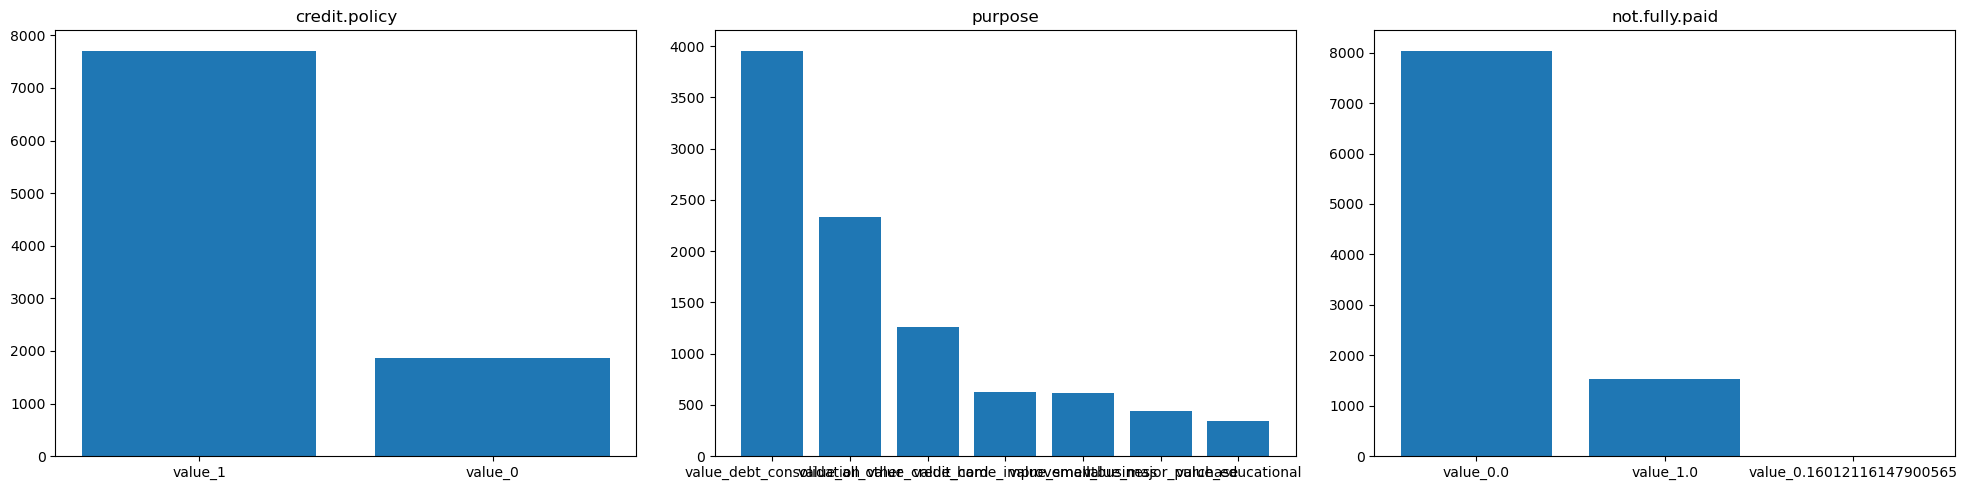

In [113]:
# Histogram of all categorical features
num_cols = 3
cat_loan_df = loan_df_c.select_dtypes('category')
categorical_cols=cat_loan_df.columns
#categorical_cols

#Number of rows per plot
num_rows = int(len(categorical_cols)/num_cols)

fig,axs = plt.subplots(num_rows,num_cols , tight_layout = True, figsize = (20,5))

#plot numerical columns
for col, ax in zip(categorical_cols, axs.flatten()[:len(categorical_cols)]):
    stats = cat_loan_df[col].value_counts()
    values = list(stats)
    names = list(map(lambda x : ''.join(('value_',str(x))),list(stats.index)))
    ax.bar(names,values)
    ax.set_title(col)
plt.show()

In [115]:
# Scatter Matrix plot of all columns
loan_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   credit.policy          9578 non-null   category
 1   purpose                9578 non-null   category
 2   int.rate               9578 non-null   float64 
 3   installment            9578 non-null   float64 
 4   log.annual.inc         9578 non-null   float64 
 5   dti                    9578 non-null   float64 
 6   days.with.cr.line      9578 non-null   float64 
 7   revol.bal              9578 non-null   int64   
 8   revol.util             9578 non-null   float64 
 9   inq.last.6mths         9578 non-null   int64   
 10  delinq.2yrs            9578 non-null   int64   
 11  pub.rec                9578 non-null   float64 
 12  not.fully.paid         9578 non-null   category
 13  Purpose_encode         9578 non-null   int32   
 14  not.fully.paid_encode  9578 non-null   i

<Axes: xlabel='int.rate', ylabel='installment'>

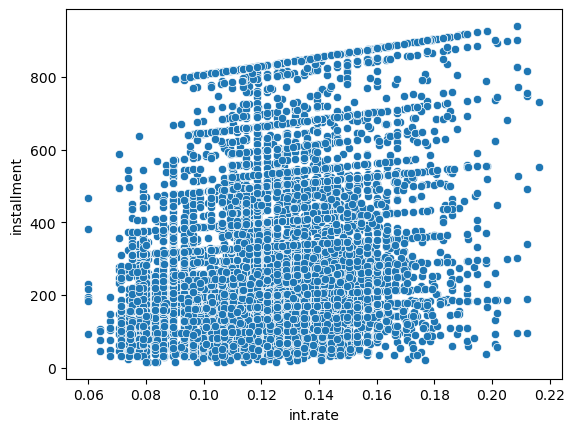

In [119]:
sns.scatterplot(x=loan_df_c['int.rate'],y=loan_df_c['installment'])

In [127]:
num=loan_df_c.select_dtypes(exclude='category')
num

,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,Purpose_encode,not.fully.paid_encode,credit.policy_encode
0,0.1189,829.10,11.350407,19.48,5639.958333,28854,52.1,0,0,0.0,2,0,1
1,0.1071,228.22,11.082143,14.29,2760.000000,33623,76.7,0,0,0.0,1,0,1
2,0.1357,366.86,10.373491,11.63,4710.000000,3511,25.6,1,0,0.0,2,0,1
3,0.1008,162.34,11.350407,8.10,2699.958333,33667,73.2,1,0,0.0,2,0,1
4,0.1426,102.92,11.299732,14.97,4066.000000,4740,39.5,0,1,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.1461,344.76,12.180755,10.39,10474.000000,215372,82.1,2,0,0.0,0,2,0
9574,0.1253,257.70,11.141862,0.21,4380.000000,184,1.1,5,0,0.0,0,2,0
9575,0.1071,97.81,10.596635,13.09,3450.041667,10036,82.9,8,0,0.0,2,2,0
9576,0.1600,351.58,10.819778,19.18,1800.000000,0,3.2,5,0,0.0,4,2,0


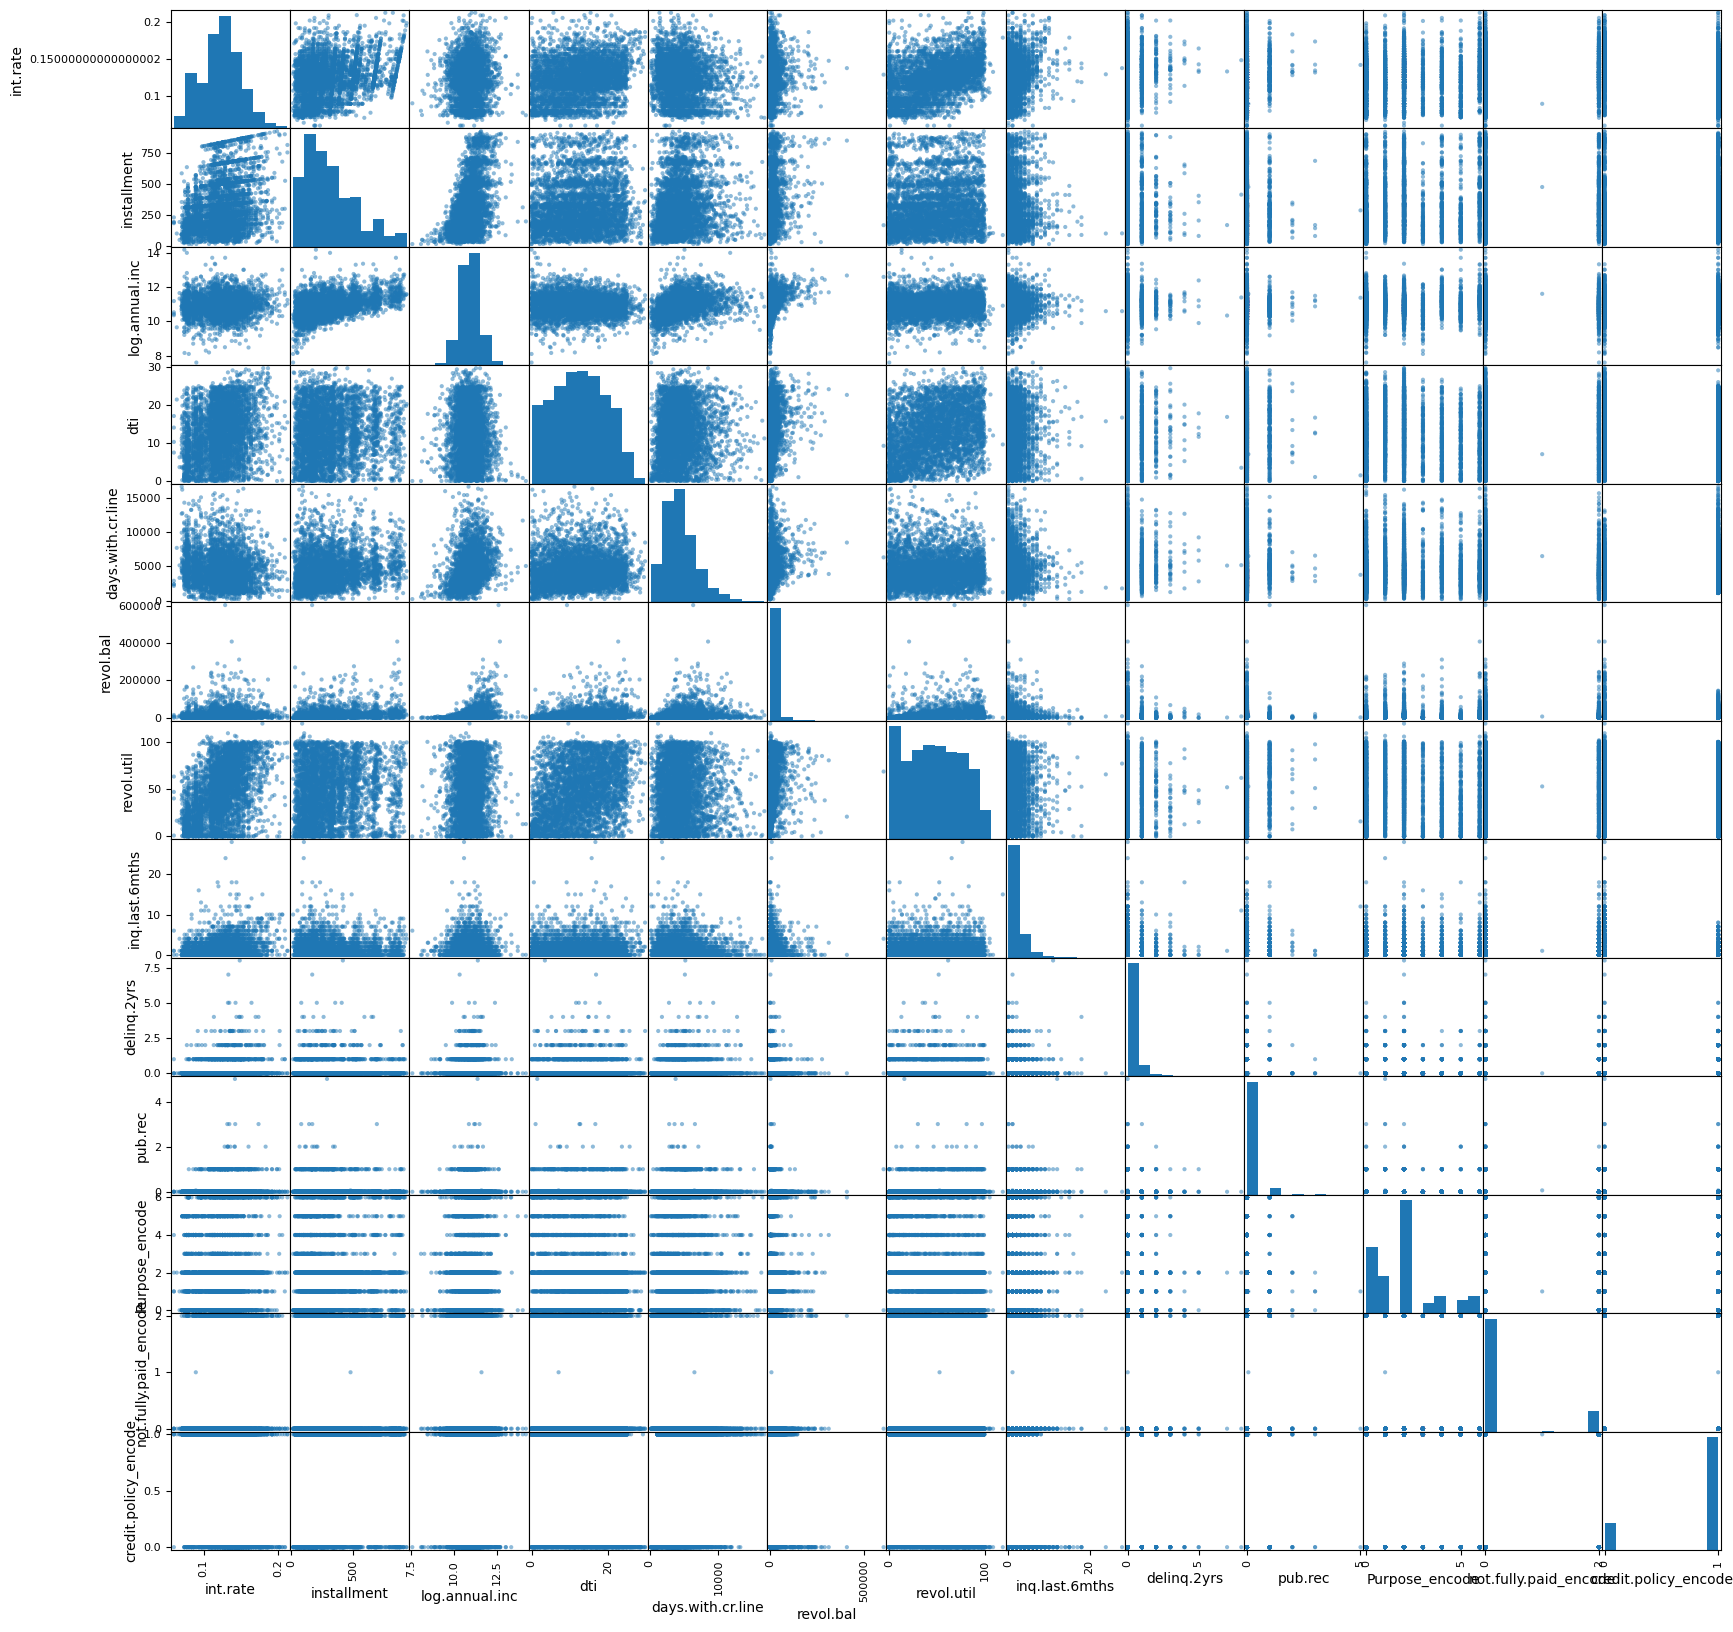

In [135]:
pd.plotting.scatter_matrix(num.sample(4000),figsize=(20,20))
plt.show()

In [61]:
# Pie charts of categorical features


In [157]:
label = loan_df_c['purpose'].value_counts.index
sizes = loan_df_c['purpose'].value_counts()
plt.pie(sizes, labels=label, autopct='%1.1f%%')
plt.show()

AttributeError: 'function' object has no attribute 'index'

In [149]:
loan_df_c['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [51]:
value=loan_df_c['credit.policy'].value_counts()
value

credit.policy
1    7710
0    1868
Name: count, dtype: int64

In [53]:
labels=list(value.index)
labels

[1, 0]

([<matplotlib.patches.Wedge at 0x181f19200b0>,
 [Text(-0.8999045323342553, 0.6325913631122904, 'good'),
  Text(0.899904532334255, -0.6325913631122905, 'bad')],
 [Text(-0.4908570176368664, 0.3450498344248856, '80.50%'),
  Text(0.49085701763686634, -0.3450498344248857, '19.50%')])

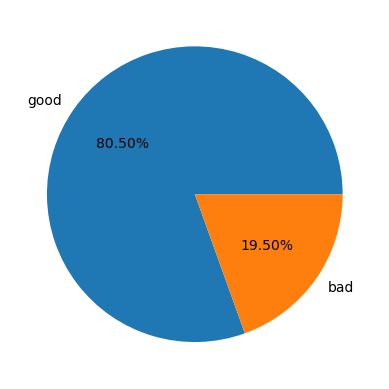

In [71]:
plt.pie(value,labels=['good','bad'],autopct="%.2f%%")